# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Cleanup

In [3]:
WoodStock = pd.read_csv("WoodStockAnalysis_2024.csv")
print(WoodStock.columns)

Index(['system:index', 'Name', 'fid', 'sum', 'timestamp', 'woodStockArea',
       '.geo'],
      dtype='object')


In [8]:
WoodStock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   system:index   146 non-null    object 
 1   Name           146 non-null    object 
 2   fid            146 non-null    int64  
 3   sum            146 non-null    float64
 4   timestamp      146 non-null    object 
 5   woodStockArea  146 non-null    float64
 6   .geo           146 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.1+ KB


## Plotting

In [9]:
#covert timestamp to datetime 
WoodStock['timestamp'] = pd.to_datetime(WoodStock['timestamp'])
WoodStock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   system:index   146 non-null    object        
 1   Name           146 non-null    object        
 2   fid            146 non-null    int64         
 3   sum            146 non-null    float64       
 4   timestamp      146 non-null    datetime64[ns]
 5   woodStockArea  146 non-null    float64       
 6   .geo           146 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 8.1+ KB


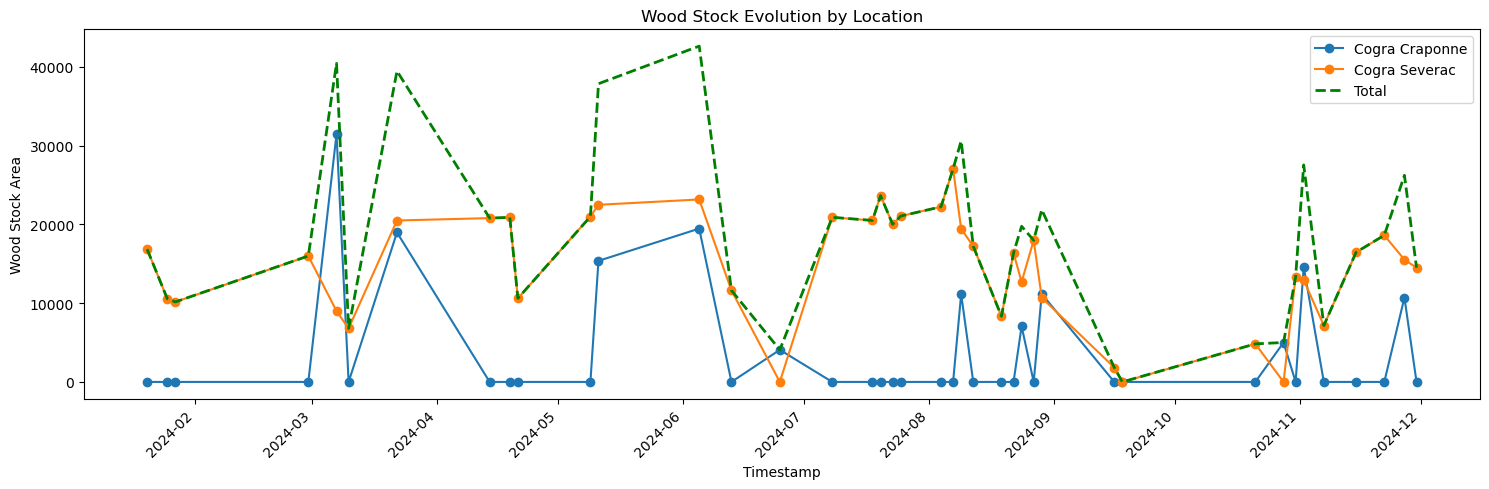

In [10]:
grouped = WoodStock.groupby(['timestamp', 'Name'])['woodStockArea'].sum().unstack()

# Create the plot
plt.figure(figsize=(15, 5))

# Plot individual names
grouped['cogra_craponne'].plot(label='Cogra Craponne', marker='o')
grouped['cogra_severac'].plot(label='Cogra Severac', marker='o')

# Plot total
grouped.sum(axis=1).plot(label='Total', linestyle='--', linewidth=2, color='green')

plt.title('Wood Stock Evolution by Location')
plt.xlabel('Timestamp')
plt.ylabel('Wood Stock Area')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Financial Data

In [11]:
ticker = "ALCOG.PA"

# Fetch price data for 2023
stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ALCOG.PA,ALCOG.PA,ALCOG.PA,ALCOG.PA,ALCOG.PA,ALCOG.PA
Date,,,,,,
2023-01-02,13.45,13.45,13.50,13.20,13.40,2996
2023-01-03,13.45,13.45,13.95,13.35,13.35,4012
2023-01-04,13.75,13.75,13.75,13.50,13.50,2697
2023-01-05,13.45,13.45,13.80,13.30,13.75,2835
2023-01-06,13.60,13.60,13.85,13.45,13.45,5473
...,...,...,...,...,...,...
2023-12-21,11.36,11.36,11.38,11.32,11.36,5783
2023-12-22,11.34,11.34,11.36,11.12,11.36,3290


<Figure size 1200x600 with 0 Axes>

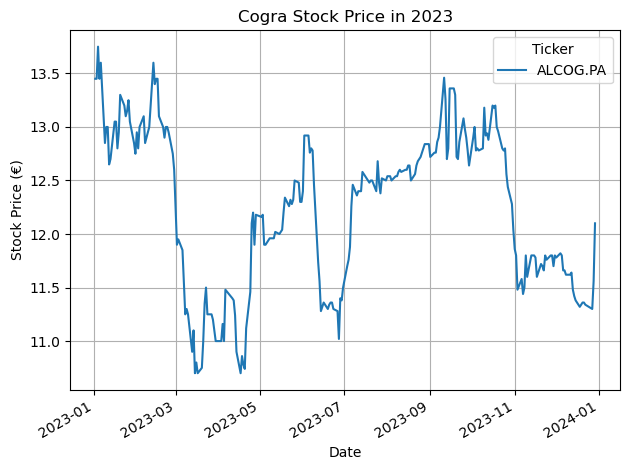

In [7]:

plt.figure(figsize=(12,6))
stock_data['Close'].plot()
plt.title(f"Cogra Stock Price in 2023")
plt.xlabel("Date")
plt.ylabel("Stock Price (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
stock_data = stock_data.reset_index()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   (Date, )               255 non-null    datetime64[ns]
 1   (Adj Close, ALCOG.PA)  255 non-null    float64       
 2   (Close, ALCOG.PA)      255 non-null    float64       
 3   (High, ALCOG.PA)       255 non-null    float64       
 4   (Low, ALCOG.PA)        255 non-null    float64       
 5   (Open, ALCOG.PA)       255 non-null    float64       
 6   (Volume, ALCOG.PA)     255 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.1 KB


## Predictions

In [14]:

merged_data = pd.merge_asof(stock_data, WoodStock, left_index=True, right_on='timestamp', direction='nearest')

# Check the result
merged_data

MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)